In [8]:
#!python -m ensurepip --upgrade
#import sys
#!{sys.executable} -m pip install xgboost

In [9]:
# Import libraries
import sklearn
import numpy as np # Mathematical and Algebraic Calculations
import pandas as pd # Data Manipulation - Dataframe (one or more series)
import matplotlib.pyplot as plt # pyplot provides functions to create, customize, and display plots
# Command used only in Jupyter Notebook to display plots inside the notebook output
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
# To use in Cross Validation, XGBoost and Logistic LASSO models among others process
from sklearn.metrics import accuracy_score, classification_report
# Load Original Dataset
df = pd.read_csv('practica_final/cybersecurity_attacks.csv')

In [10]:
# Check basic info about the dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [11]:
# Returns the dimensions of the DataFrame as a tuple (rows,columns)
df.shape

(40000, 25)

In [12]:
# Show the first few rows of the dataset
pd.set_option('display.max_columns', None)
df.head(5)


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,28.67,NaN,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,IoC Detected,51.50,NaN,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,NaN,15.79,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,NaN,0.52,Alert Triggered,DDoS,Known Pattern B,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [13]:
# Check for missing values
df.isnull().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [14]:
# [Index(row labels), Columnd Names, Values)] 
index = df.index
columns = df.columns
values = df.values
print(index)
print(columns)
print(type(values))

RangeIndex(start=0, stop=40000, step=1)
Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')
<class 'numpy.ndarray'>


In [15]:
# To separate categorical and numerical columns 
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: Index(['Timestamp', 'Source IP Address', 'Destination IP Address', 'Protocol',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken',
       'Severity Level', 'User Information', 'Device Information',
       'Network Segment', 'Geo-location Data', 'Proxy Information',
       'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')
Numerical columns: Index(['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores'], dtype='object')


Although Source Port and Destination Port are indeed represented as numbers in the dataset, they do not inherently possess numerical meaning, and therefore performing mathematical operations like addition or multiplication on them may not be meaningful.
In the case of Packet Length, the size of the packet, and, Mean, median, standard deviation of packet lengths can provide useful insights. Anomaly scores are a valuable numerical feature for machine learning models, particularly when analyzing outliers or unusual data points.

In [16]:
# Shows the data type of each column
print(df.dtypes) 

Timestamp                  object
Source IP Address          object
Destination IP Address     object
Source Port                 int64
Destination Port            int64
Protocol                   object
Packet Length               int64
Packet Type                object
Traffic Type               object
Payload Data               object
Malware Indicators         object
Anomaly Scores            float64
Alerts/Warnings            object
Attack Type                object
Attack Signature           object
Action Taken               object
Severity Level             object
User Information           object
Device Information         object
Network Segment            object
Geo-location Data          object
Proxy Information          object
Firewall Logs              object
IDS/IPS Alerts             object
Log Source                 object
dtype: object


In [17]:
# Check basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [18]:
# Show descriptive statistics
df.describe(include = 'all').fillna('-')

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
count,40000,40000,40000,40000.0,40000.0,40000,40000.0,40000,40000,40000,20000,40000.0,19933,40000,40000,40000,40000,40000,40000,40000,40000,20149,20039,19950,40000
unique,39997,40000,40000,-,-,3,-,2,3,40000,1,-,1,3,2,3,3,32389,32104,3,8723,20148,1,1,2
top,2022-06-11 14:28:15,103.216.15.12,84.9.164.252,-,-,ICMP,-,Control,DNS,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,-,Alert Triggered,DDoS,Known Pattern A,Blocked,Medium,Ishaan Chaudhari,Mozilla/5.0 (compatible; MSIE 6.0; Windows NT ...,Segment C,"Ghaziabad, Meghalaya",39.123.165.122,Log Data,Alert Data,Firewall
freq,2,1,1,-,-,13429,-,20237,13376,1,20000,-,19933,13428,20076,13529,13435,6,35,13408,16,2,20039,19950,20116
mean,-,-,-,32970.35645,33150.86865,-,781.452725,-,-,-,-,50.113473,-,-,-,-,-,-,-,-,-,-,-,-,-
std,-,-,-,18560.425604,18574.668842,-,416.044192,-,-,-,-,28.853598,-,-,-,-,-,-,-,-,-,-,-,-,-
min,-,-,-,1027.0,1024.0,-,64.0,-,-,-,-,0.0,-,-,-,-,-,-,-,-,-,-,-,-,-
25%,-,-,-,16850.75,17094.75,-,420.0,-,-,-,-,25.15,-,-,-,-,-,-,-,-,-,-,-,-,-
50%,-,-,-,32856.0,33004.5,-,782.0,-,-,-,-,50.345,-,-,-,-,-,-,-,-,-,-,-,-,-
75%,-,-,-,48928.25,49287.0,-,1143.0,-,-,-,-,75.03,-,-,-,-,-,-,-,-,-,-,-,-,-


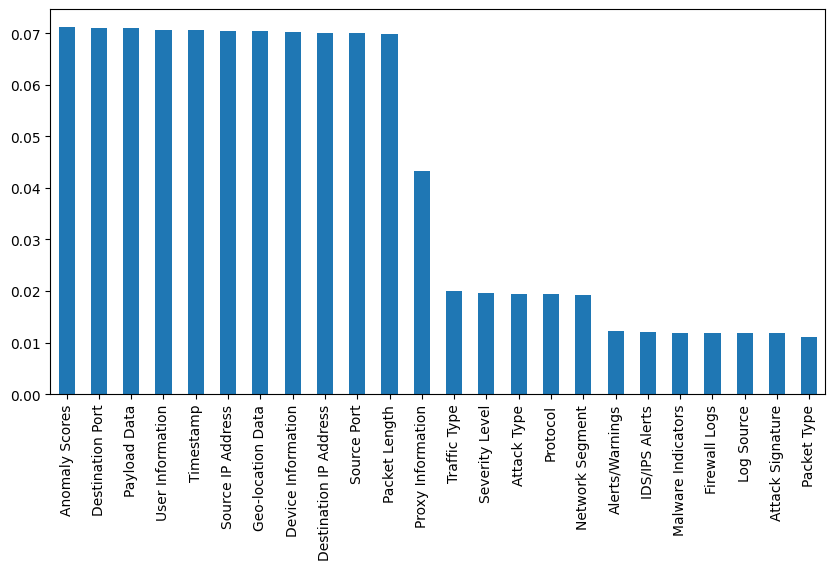

In [19]:
# I decided to use Random Forest as a decision tree-based model that calculates the importance of each feature based on its contribution 
# to the model'sperformance. It does not directly penalize features; instead, it evaluates them according to their relevance.

from sklearn.ensemble import RandomForestClassifier

# Encode categorical target variable
df_encoded = df.copy()
df_encoded["Action Taken"] = LabelEncoder().fit_transform(df_encoded["Action Taken"])

# Convert categorical features to numerical (Label Encoding)
for col in df_encoded.select_dtypes(include="object").columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Define model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(df_encoded.drop("Action Taken", axis=1), df_encoded["Action Taken"])

# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=df_encoded.drop("Action Taken", axis=1).columns)
feature_importance.sort_values(ascending=False).plot(kind="bar", figsize=(10,5))
plt.show()

The previous bar graph does not directly compare "Action Taken" to the other features in terms of traffic or cybersecurity activity.
The feature importance graph is showing how important each feature (column) is for predicting the target variable ("Action Taken") 
 based on the trained RandomForestClassifier. 

In [20]:
# Empty Categorical Columns to replace with "Unknown"  
df_copy = df.copy()
# List of the categorical columns
categorical_columns = ['Timestamp', 'Source IP Address', 'Destination IP Address', 'Protocol',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken',
       'Severity Level', 'User Information', 'Device Information',
       'Network Segment', 'Geo-location Data', 'Proxy Information',
       'Firewall Logs', 'IDS/IPS Alerts', 'Log Source']
# Loop through each column and fill NaN values with 'Unknown' in the copy
for col in categorical_columns:
    df_copy[col].fillna('Unknown', inplace=True)
df_copy.shape

(40000, 25)

In [21]:
# Verification for missing values
for col in df_copy.columns:
    total_nulls = df_copy[col].isnull().sum()  # Count the null values
    total_non_nulls = df_copy[col].notnull().sum()  # Count the non-null values
print(f'Total nulls: {total_nulls}')
print(f'Total non-nulls: {total_non_nulls}')

Total nulls: 0
Total non-nulls: 40000


In [22]:
# Target conversion to numerical representation
df_encode = df_copy.copy()
df_encode["Action Taken"] = LabelEncoder().fit_transform(df_encode["Action Taken"])
# Convert categorical features to numerical representation (Label Encoding)
for col in df_encode.select_dtypes(include="object").columns:
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])
# Content verification
pd.set_option('display.max_columns', None)
df_encode.head(3)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,36141,939,37091,31225,17616,0,503,1,2,29502,0,28.67,1,2,1,2,1,22830,18202,0,3723,5143,0,1,1
1,6759,35826,33418,17245,48166,0,1174,1,2,2600,0,51.50,1,2,0,0,1,27434,18188,1,1677,20148,0,1,0
2,30425,32917,19496,16811,53600,2,306,0,2,26898,0,87.42,0,0,1,1,1,10139,18280,2,1707,1568,0,0,0


- My first approximation to the whole process was the elimination of rows with null values, but after some testing and analysis I      decided to use the original dataset. 
- I dedicated several days to using up to a total of 17 columns out of the 24 available to try to achieve a process that would         ultimately provide strong predictions, but I was unable to achieve this.
- After  I split the "Geo-location Data" and tested two different data, I didn't find a sustainable difference 
  in the results; so based on that I used the "Geo-location Data" as a whole.

In [23]:
# Selected_columns 
selected_columns = ['Action Taken',
                    'Source Port', 'Destination Port', 'Anomaly Scores', 'Geo-location Data']
df_selected = df_encode[selected_columns].copy()
df_clean = df_selected
pd.set_option('display.max_columns', None)
df_clean.head(3)

,Action Taken,Source Port,Destination Port,Anomaly Scores,Geo-location Data
0,2,31225,17616,28.67,3723
1,0,17245,48166,51.50,1677
2,1,16811,53600,87.42,1707


In [24]:
# Target Variable
X = df_clean.drop(columns=["Action Taken"])
y = df_clean["Action Taken"]

In [25]:
# Train Test Split next Step to follow
# División train/test [20% for testing, 80% for training]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
train_size = int(0.2 * len(df_clean)) 
df_train = df_clean[:train_size]
df_test = df_clean[train_size:]
# Separate features (X) and target (y) for both training and test sets
X_train = df_train.drop(columns=["Action Taken"])
y_train = df_train["Action Taken"]

X_test = df_test.drop(columns=["Action Taken"])
y_test = df_test["Action Taken"]

In [27]:
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (8000, 4) (8000,)
Testing set: (32000, 4) (32000,)


Cramér's V is a statistical measure of association between two CATEGORICAL variables. 
It is based on the Chi-squared statistic and measures the strength of the association between the two variables. # Cramér's V values range from 0 to 1.
- 0 indicates no association between the two variables (they are independent).
- 1 indicates a perfect association between the two variables (they are perfectly dependent on each other

In [28]:
from scipy.stats import chi2_contingency

# Define a function to compute Cramér's V
def cramers_v(confusion_matrix):
    # Compute the Chi-squared statistic
    chi2, p, dof, ex = chi2_contingency(confusion_matrix)
    # Compute Cramér's V statistic
    n = np.sum(confusion_matrix)
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Now, calculate Cramér's V for pairs of categorical features
# Create a list of feature columns (excluding 'Action Taken' for this example)
feature_columns = ['Source Port', 'Destination Port', 'Anomaly Scores', 'Geo-location Data']

# Create an empty dictionary to store results
cramers_v_results = {}

# Calculate Cramér's V for each pair of features and the target
for col in feature_columns:
    # Create a contingency table between 'Action Taken' and the feature column
    contingency_table = pd.crosstab(df_clean['Action Taken'], df_clean[col])
    
    # Compute Cramér's V for the contingency table
    cramers_v_val = cramers_v(contingency_table.values)
    
    # Store the result in the dictionary
    cramers_v_results[col] = cramers_v_val

# Output the results
for feature, v_value in cramers_v_results.items():
    print(f"# Cramér's V between 'Action Taken' and '{feature}': {v_value:.4f}")

# Cramér's V between 'Action Taken' and 'Source Port': 0.8635
# Cramér's V between 'Action Taken' and 'Destination Port': 0.8649
# Cramér's V between 'Action Taken' and 'Anomaly Scores': 0.4942
# Cramér's V between 'Action Taken' and 'Geo-location Data': 0.4636


A value of 0.8635 suggests a strong positive association between 'Action Taken' and 'Source Port'. Because of this strong correlation,
I decided to keep 'Source Port' as an important feature because it could play a key role in predicting the target variable (action taken). A similar conclusion with 'Destination Port'. A value of 0.4942 indicates a moderate association between 'Action Taken' and 'Anomaly Scores'. 
'Anomaly Scores' is somewhat useful in predicting the action taken but is less significant compared to the ports. It suggests that while anomalies may influence decisions (for example, when an anomaly score exceeds a threshold), they are not the primary determinant.
Similar to anomaly scores, 'Geo-location Data' plays a secondary role in predicting the action taken.  

The following comments are related to previous features selections results:
These values are very close to 0, # 0.0065, 0.0066, and 0.0042 are extremely low values, which suggests that there is no significant association between the target variable ('Action Taken') and the features ('Severity Level', 'Attack Type', 'Protocol').
In practical terms, these values suggest that changes in 'Severity Level', 'Attack Type', and 'Protocol' are not strongly influencing the outcome
(i.e., the 'Action Taken').

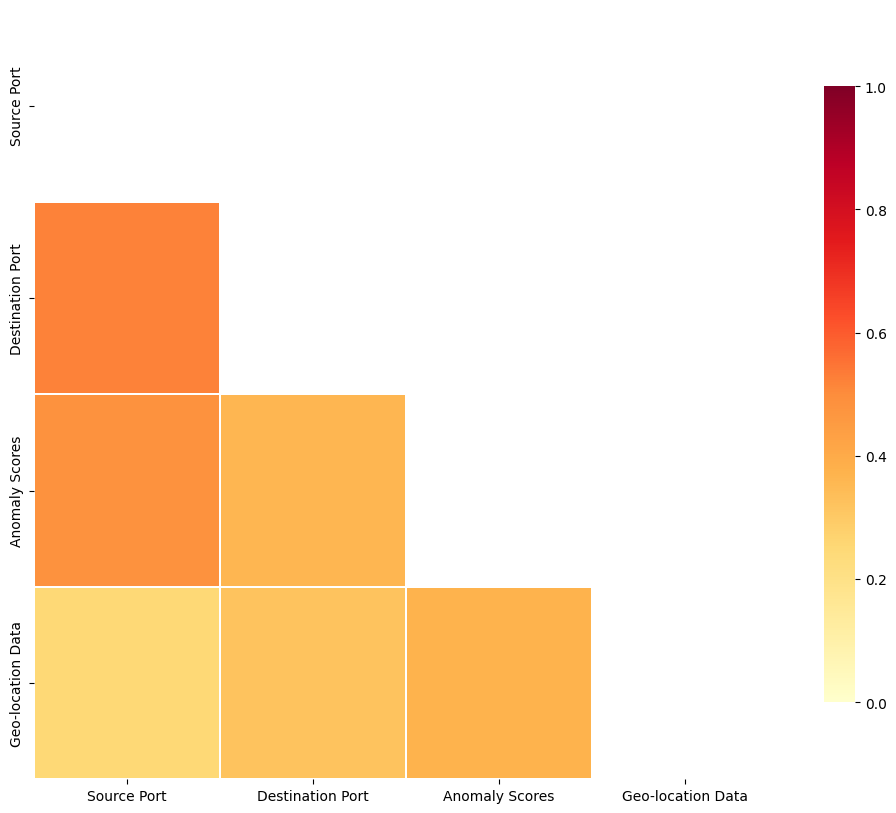

In [29]:
# Correlation Analysis
# Correlation Matrix with Hetmap Visualization
import seaborn as sns

# Compute the correlation matrix
#corr = np.abs(df_encode.drop(['Action Taken'], axis=1).corr())
corr = np.abs(df_clean.drop(['Action Taken'], axis=1).corr())*100

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmin=0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlOrRd", cbar_kws={"shrink": .8})

plt.show()

The intensity of the color reflects the strength of the correlation between features. Features that are strongly correlated
(those with darker shades, closer to red) indicate that these features tend to behave similarly, while those with lighter shades (closer to yellow) show weak or no correlation. I noticed while looking at this bar graph that, Source Port and Destination Port have the strongest correlation, and Source Port and Anomaly Scores also have a certain degree of correlation as well. Geo-location shows little to no correlation to Source Port or Destination Port.

In [30]:
pd.set_option('display.max_columns', None)
df_clean.head(3)

,Action Taken,Source Port,Destination Port,Anomaly Scores,Geo-location Data
0,2,31225,17616,28.67,3723
1,0,17245,48166,51.50,1677
2,1,16811,53600,87.42,1707


The results from cross-validation using a Random Forest Classifier provide important insights into the performance and stability of the model. 

In [31]:
# Cross Validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

X = df_clean.drop('Action Taken', axis=1)  # Features (drop the target column)
y = df_clean['Action Taken']  # Target variable

# Configuring Stratified Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model definition
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Execute Cross-Validation
cv_scores = cross_val_score(rf, X, y, cv=cv, scoring="accuracy")

# Show the results
print(f"Accuracy scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")

Accuracy scores: [0.326375 0.335625 0.336    0.3315   0.340125]
Mean accuracy: 0.3339
Standard deviation: 0.0047


I received the previous accuracy scores for the 5 folds in the Stratified K-fold Cross-Validation.
The accuracy scores range from about 32.64% to 34.01%. These values suggest that the model is correctly classifying roughly one-third of the instances in each fold. While the model is making more correct predictions than random guessing (which would be around 20-25% depending on the number of classes), these accuracy scores are quite low for a classification model. This might indicate that the model is not capturing important patterns in the data or that the data itself may be difficult to classify.
The mean accuracy of 33.39% tells me that, on average, the model is correct about one-third of the time. This is relatively low, especially for a supervised classification task, where we typically aim for accuracy rates significantly higher than random chance (which would be much lower than 33% for most classification tasks with more than 2 classes). The standard deviation of 0.0047 is very small, indicating that the model's performance is fairly stable across the different folds. This means the model is consistently achieving similar accuracy on each fold of the data. 

Logistic regression is a supervised machine learning algorithm used for binary classification.
The results I obtained from the Logistic Regression model provided me with valuable insights into the model’s performance.

In [32]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
# Create the logistic regression model
#model = LogisticRegression()
model = LogisticRegression(max_iter=500)  # Increase iterations to 500 or more

# Train the model with the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [34]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.3350
[[7126 3427  244]
 [7011 3353  262]
 [7002 3333  242]]
              precision    recall  f1-score   support

           0       0.34      0.66      0.45     10797
           1       0.33      0.32      0.32     10626
           2       0.32      0.02      0.04     10577

    accuracy                           0.34     32000
   macro avg       0.33      0.33      0.27     32000
weighted avg       0.33      0.34      0.27     32000



The previous results of accuracy of 33.50% means that the model correctly predicted the target variable (i.e., the "Action Taken" class) approximately one-third of the time. This is relatively low, indicating that the model is not performing well in distinguishing between the different classes in the dataset. 
This confusion matrix shows the counts of true positives, true negatives, false positives, and false negatives.
•	In the first row, 7126 samples of class 0 were correctly predicted as class 0 (true positives), 3427 were incorrectly predicted as class 1, and 244 were incorrectly predicted as class 2. Similarily, with the othar two roads. •	The diagonal elements (7126, 3353, and 3333) represent the true positives where the model predicted the correct class. 
•	Precision: Of all the instances the model predicted as class 0, 34% were actually class 0 (false positives are relatively high).
•	Recall: The model correctly identified 66% of all actual class 0 instances (false negatives are lower, so it's catching more of      class 0).
•	F1-Score: The F1-score is the harmonic mean of precision and recall, and here it is 0.45, which balances both metrics. It’s          relatively low, suggesting that while recall is decent, precision is not as good.
Similarly explanation based on the numbers obtained for class 1 and 2.

XGBoost is a powerful machine learning algorithm based on gradient boosting, optimized for speed and performance. It is widely used for classification and regression tasks due to its efficiency and high accuracy.

In [35]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train XGBoost Model
model = XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Ensure df_test is the correct DataFrame where y_pred should go
df_test = df_test.copy()  # Make sure df_test is a copy, not a view
df_test.loc[:, "Predicted Action Taken"] = y_pred  # Correct assignment to the test set
#print(df_test[["Predicted Action Taken"]])

# Save the results to a new CSV file
df_test.to_csv("predicted_action_taken.csv", index=False)

# Evaluating the Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 33.01%
              precision    recall  f1-score   support

           0       0.34      0.43      0.38     10797
           1       0.32      0.31      0.32     10626
           2       0.33      0.25      0.28     10577

    accuracy                           0.33     32000
   macro avg       0.33      0.33      0.33     32000
weighted avg       0.33      0.33      0.33     32000



The previous results are similar to those already obtained in previous prediction models and don't need to be explained again.

LASSO (Least Absolute Shrinkage and Selection Operator)
Logistic LASSO is a type of regularized regression specifically used for classification problems. It's a variant of Logistic Regression 
that uses L1 regularization  to shrink the coefficients of less important features to zero. 

In [36]:
# Assuming df_clean is your DataFrame with the relevant columns
# Select columns: target 'Action Taken' and features
X = df_clean[['Source Port', 'Destination Port', 'Anomaly Scores', 'Geo-location Data']]
y = df_clean['Action Taken']

# Standardize the features (important for L1 regularization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [37]:
# Create Logistic Regression model with L1 regularization (Logistic LASSO)
lasso_model = LogisticRegression(penalty='l1', solver='saga', random_state=42)

# Train the model
lasso_model.fit(X_train, y_train)


LogisticRegression(penalty='l1', random_state=42, solver='saga')

In [38]:
# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 33.96%
              precision    recall  f1-score   support

           0       0.35      0.62      0.44      2733
           1       0.33      0.38      0.35      2622
           2       0.36      0.01      0.01      2645

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.27      8000
weighted avg       0.34      0.34      0.27      8000



Again, the previous results are similar to those already obtained in previous prediction models and do not need to be re-explained.

In [39]:
# View the coefficients of the features
coefficients = lasso_model.coef_
print(f"Feature coefficients: {coefficients}")

Feature coefficients: [[ 0.01782145  0.00906148  0.         -0.01064131]
 [-0.0015026  -0.0182488  -0.00735605  0.01192746]
 [ 0.          0.          0.00022416  0.        ]]


I believe that more specialized studies in Machine Learning, the Python language, and in particular a detailed study and interpretation of the statistical models used for ML, are necessary for evaluating this network traffic topic.